In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

consultants = pd.read_csv("consultants.csv")
projects = pd.read_csv("Projects.csv")
timesheets = pd.read_csv("Timesheets.csv")
clients = pd.read_csv("Clients.csv")


In [ ]:
# Standardize column names
for df in [consultants, projects, timesheets, clients]:
    df.columns = df.columns.str.strip().str.lower()

# Convert dates
projects['start_date'] = pd.to_datetime(projects['start_date'], errors='coerce')
projects['end_date'] = pd.to_datetime(projects['end_date'], errors='coerce')
timesheets['work_date'] = pd.to_datetime(timesheets['work_date'], errors='coerce')

# Handle missing values
projects.fillna({'budget_eur': 0}, inplace=True)
clients.fillna({'satisfaction_score': 0}, inplace=True)


In [ ]:
print("Consultants table:", consultants.shape)
print("Projects table:", projects.shape)
print("Timesheets table:", timesheets.shape)
print("Clients table:", clients.shape)

print("\nMissing values in Projects:")
print(projects.isna().sum())


Consultants table: (50, 8)
Projects table: (200, 7)
Timesheets table: (1000, 5)
Clients table: (50, 6)

Missing values in Projects:
project_id      0
client_id       0
project_name    0
start_date      0
end_date        0
budget_eur      0
status          0
dtype: int64


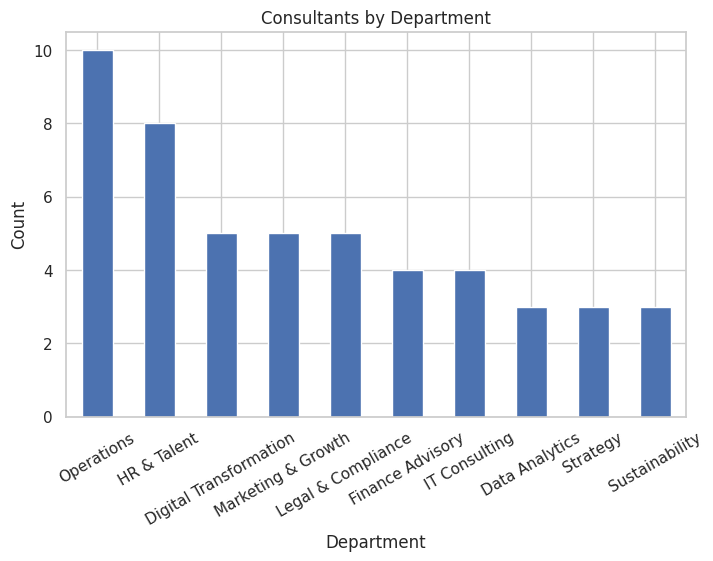

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

consultants['department'].value_counts().plot(kind='bar')
plt.title("Consultants by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


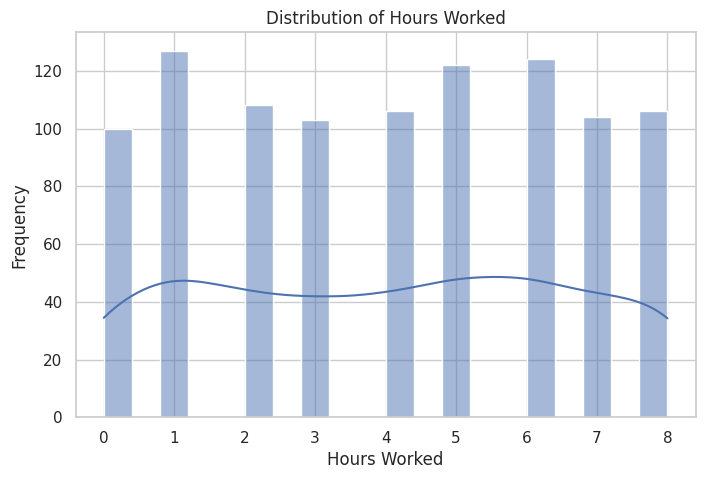

In [ ]:
sns.histplot(timesheets['hours_worked'], bins=20, kde=True)
plt.title("Distribution of Hours Worked")
plt.xlabel("Hours Worked")
plt.ylabel("Frequency")
plt.show()


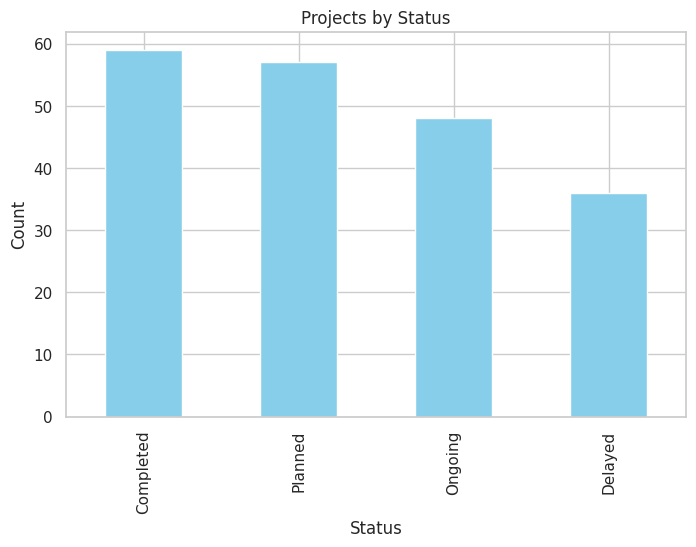

In [ ]:
projects['status'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Projects by Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


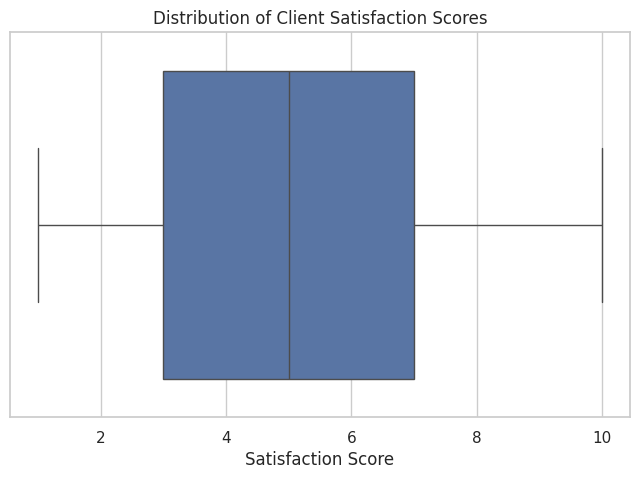

In [ ]:
sns.boxplot(x='satisfaction_score', data=clients)
plt.title("Distribution of Client Satisfaction Scores")
plt.xlabel("Satisfaction Score")
plt.show()


In [ ]:
# Average hours worked
print("Average Hours Worked:", timesheets['hours_worked'].mean())

# Top 5 busiest consultants
top_consultants = (timesheets.groupby('consultant_id')['hours_worked']
                   .sum()
                   .sort_values(ascending=False)
                   .head())
print("Top 5 busiest consultants:\n", top_consultants)


Average Hours Worked: 4.006
Top 5 busiest consultants:
 consultant_id
1035    140
1028    125
1003    118
1012    117
1001    114
Name: hours_worked, dtype: int64
